+ Learn faeture_seloection:

  + https://github.com/solegalli/feature-selection-for-machine-learning/blob/main/04-Correlation/04.1-Correlation-Pearson.ipynb

  + https://github.com/krishnadulal/Feature-Selection-in-Machine-Learning-using-Python-All-Code/tree/master/Filtering%20Method

#**Filter-Statistical-Tests**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [ ]:
data = pd.read_csv('/content/santander-train.csv', nrows = 20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
X = data.drop('TARGET', axis = 1)
y = data['TARGET']

X.shape, y.shape

((20000, 370), (20000,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

###**Déterminer l'information mutuelle**

In [ ]:
# calculer l'information mutuelle entre les variables et la cible

# plus la valeur de mi est petite, moins on peut déduire d'informations à partir de
# la caractéristique sur la cible

mi = mutual_info_classif(X_train, y_train)
mi

array([2.60937757e-03, 0.00000000e+00, 1.20171724e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.92670387e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.73978370e-04,
       1.00723064e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.79342758e-03, 1.00285942e-03, 0.00000000e+00, 9.67412797e-04,
       0.00000000e+00, 0.00000000e+00, 3.95223147e-04, 0.00000000e+00,
       1.61336852e-03, 9.73037238e-03, 0.00000000e+00, 0.00000000e+00,
       7.17460328e-05, 0.00000000e+00, 1.74692401e-03, 0.00000000e+00,
       2.25768206e-03, 1.94429729e-03, 3.75498065e-04, 0.00000000e+00,
       3.77695289e-04, 1.15011086e-04, 0.00000000e+00, 1.89383227e-04,
       1.35356834e-03, 4.83677637e-04, 0.00000000e+00, 1.90865971e-03,
       2.24141841e-03, 0.00000000e+00, 6.35491178e-04, 7.29225269e-04,
       0.00000000e+00, 1.54684313e-03, 2.85516096e-03, 1.77833337e-03,
       3.00397422e-04, 4.70763249e-05, 0.00000000e+00, 1.37493091e-03,
      

Text(0, 0.5, 'Information mutuelle')

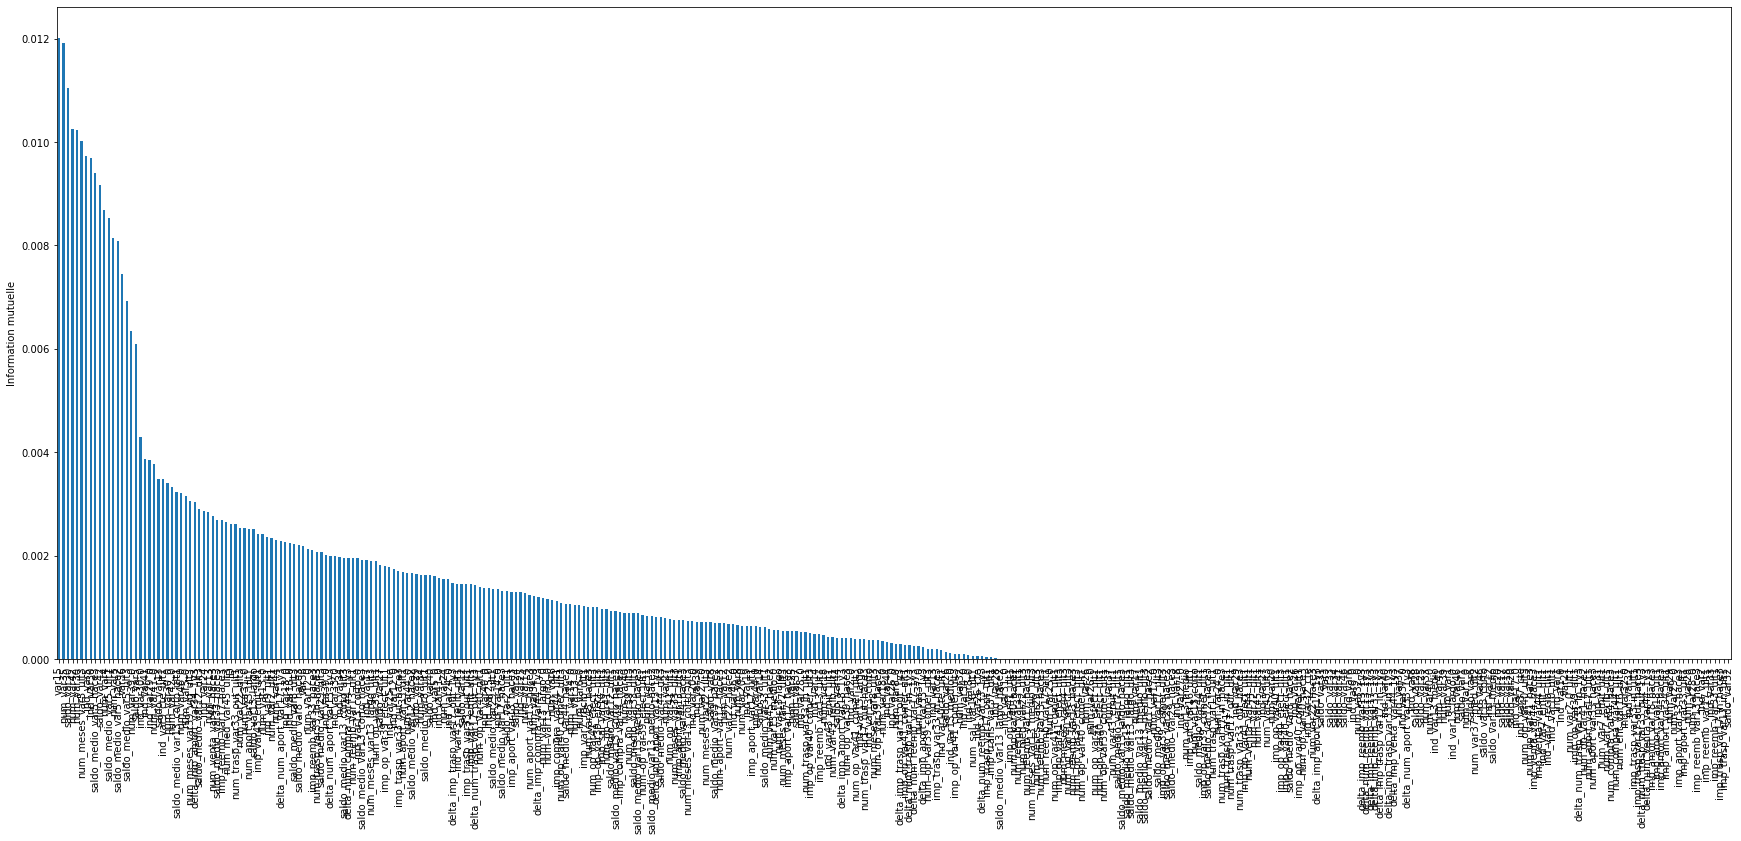

In [ ]:
# 1) capturons le tableau ci-dessus dans une série pandas
# 2) ajoutons les noms des variables dans l'index
# 3) trions les caractéristiques en fonction de leur valeur d'information mutuelle
# 4) et créons un graphique var

mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(30, 12))
plt.ylabel('Information mutuelle')

+ Il y a quelques caractéristiques (à gauche du graphique) avec des valeurs d'information mutuelle plus élevées. 

+ Il y a également des caractéristiques avec des valeurs d'information mutuelle presque nulles sur la droite du graphique.

+ Une fois que nous avons trouvé les valeurs d'information mutuelle, pour sélectionner les caractéristiques, nous devons déterminer un seuil, ou une valeur de coupure, au-dessus duquel une caractéristique sera sélectionnée.

+ Il y a plusieurs façons de procéder :

  + **Sélectionner les k premières caractéristiques, où k est un nombre arbitraire de caractéristiques.**

  + **Sélectionner les caractéristiques dans le percentile n supérieur, où n est également un nombre arbitraire.**

  + **Sélectionner toutes les caractéristiques au-dessus d'un certain seuil de MI, décidé arbitrairement.**

+ **Le transformateur de Scikit-learn SelectKBest, nous permet de sélectionner automatiquement les k meilleures caractéristiques, sur la base de n'importe quelle valeur statistique, y compris le MI.**

+ **SelectPercentile de Sklearn nous permet de sélectionner les caractéristiques dans le percentile supérieur de n'importe quelle valeur statistique, y compris le MI.**

+ Alternativement, si nous voulons sélectionner des caractéristiques basées sur un seuil MI, nous pouvons le faire manuellement.

#**Sélectionner les k meilleures caractéristiques basées sur le MI**

In [ ]:
# Ici, nous allons sélectionner les 10 meilleures caractéristiques
# en fonction de leur valeur d'information mutuelle

# Sélectionnez les caractéristiques
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)

# afficher les caractéristiques
X_train.columns
[sel_.get_support()]

Index(['var15', 'ind_var30', 'num_var5', 'num_var30', 'num_var35', 'num_var42',
       'saldo_var30', 'saldo_var42', 'num_meses_var5_ult3',
       'saldo_medio_var5_ult1'],
      dtype='object')

In [ ]:
# to remove the rest of the features:

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

In [ ]:
X_train

array([[24.,  1.,  3., ...,  3.,  3.,  3.],
       [23.,  0.,  0., ...,  0.,  0.,  0.],
       [45.,  1.,  3., ...,  3.,  3.,  3.],
       ...,
       [43.,  0.,  0., ...,  0.,  0.,  0.],
       [23.,  1.,  3., ...,  3.,  3.,  3.],
       [23.,  1.,  3., ...,  3.,  3.,  3.]])

###**Regression**

In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
data = pd.read_csv("/content/train.csv")

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# En pratique, la sélection des caractéristiques doit être faite après le prétraitement des données,
# donc idéalement, toutes les variables catégorielles sont encodées en nombres,
# et ensuite vous pouvez évaluer à quel point elles sont déterministes de la cible.

# Ici, pour simplifier, je n'utiliserai que des variables numériques.
# sélectionner les colonnes numériques :

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [ ]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [ ]:
## fill missing values

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

###**Determine Mutual Information**

Text(0, 0.5, 'Mutual Information')

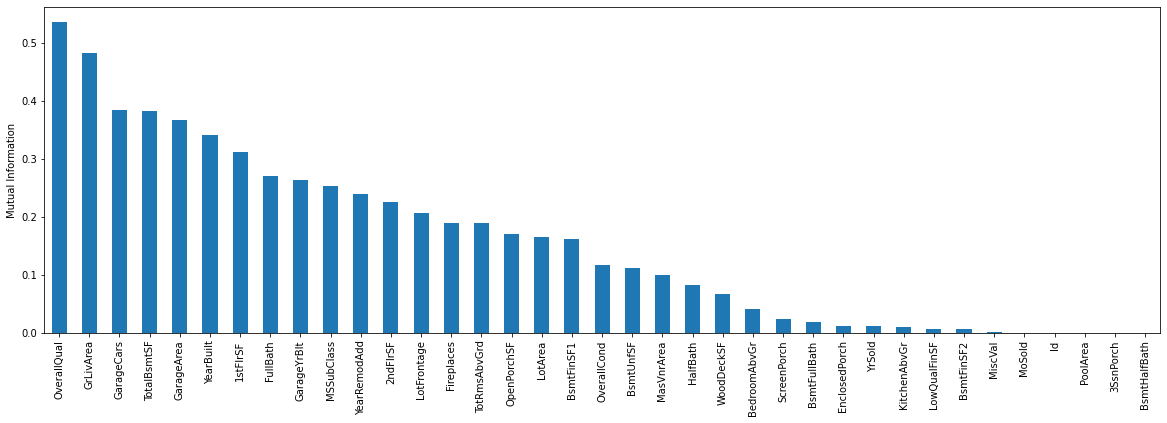

In [ ]:
# determine the mutual information
mi = mutual_info_regression(X_train, y_train)

# and make a bar  plot
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20,6))
plt.ylabel('Mutual Information')

###**Select top 10th percentile features**

In [ ]:
# Select the features in the top percentile
sel_ = SelectPercentile(mutual_info_regression, percentile=10).fit(X_train, y_train)

# display the features
X_train.columns[sel_.get_support()]

Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars'], dtype='object')

In [ ]:
len(X_train.columns[sel_.get_support()])

4

In [ ]:
# to remove the rest of the features:

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

X_train

array([[7.000e+00, 1.057e+03, 2.034e+03, 2.000e+00],
       [6.000e+00, 1.291e+03, 1.291e+03, 2.000e+00],
       [5.000e+00, 8.580e+02, 8.580e+02, 0.000e+00],
       ...,
       [6.000e+00, 0.000e+00, 1.902e+03, 2.000e+00],
       [7.000e+00, 1.374e+03, 1.557e+03, 2.000e+00],
       [7.000e+00, 1.195e+03, 1.839e+03, 2.000e+00]])

###**Chi-deux**
+ **Calculer le test du chi carré entre les caractéristiques catégorielles et la cible de classification.**

  $$X^2 = \sum_{}^{}\frac{(observed — expected)^2}{expected}$$


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

##from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(titanic.drop("survived", axis=1),
    titanic['survived'],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((623, 14), (268, 14))

In [ ]:
# contingency table for gender

c = pd.crosstab(y_train, X_train['sex'])

c

sex,female,male
survived,,
0,53,328
1,162,80


In [ ]:
chi2(c)

In [ ]:
# To rank all features

chi_ls = []

for feature in X_train.columns:
    
    # create contingency table
    c = pd.crosstab(y_train, X_train[feature])
    
    # chi_test
    p_value = chi2(c)[1]
    chi_ls.append(p_value)

In [ ]:
pd.Series(chi_ls, index=X_train.columns).sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel('p value')
plt.title('Feature importance based on chi-square test')

In [ ]:
# select top 3

selected = pd.Series(chi_ls, index=X_train.columns).sort_values(
    ascending=True)[0:3].index

selected

In [ ]:
# sklearn returns numpy arrays. Convert to dataframe

X_train = X_train[selected]
X_test = X_test[selected]

X_train.head()